In [1]:
!pip install datetime

In [2]:
import hydrofunctions as hf
from datetime import date, timedelta
import json

In [3]:
%matplotlib inline

In [4]:
creek_water_gauge_num = '06730200'
# Boulder Creek at 75th - https://waterdata.usgs.gov/nwis/inventory?agency_code=USGS&site_no=06730200

In [5]:
today = datetime.datetime.now().strftime('%Y-%m-%d')
print(today)

yesterday = date.today() - timedelta(days=1)
yesterday = yesterday.strftime('%Y-%m-%d')
print(yesterday)

two_days_ago = date.today() - timedelta(days=2)
two_days_ago = two_days_ago.strftime('%Y-%m-%d')
print(two_days_ago)

NameError: name 'datetime' is not defined

In [107]:
start = two_days_ago
end = yesterday

herring = hf.NWIS(creek_water_gauge_num, 'dv', start, end)
herring.get_data()

<AxesSubplot:xlabel='datetime'>

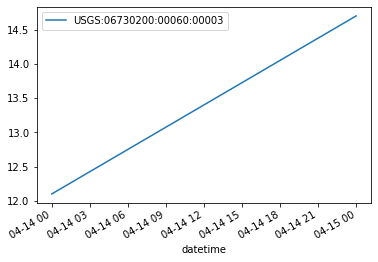

In [108]:
herring.df().plot()

In [117]:
cfs_yesterday = float(herring.json()['value']['timeSeries'][0]['values'][0]['value'][1]['value'])
cfs_two_days_ago = float(herring.json()['value']['timeSeries'][0]['values'][0]['value'][0]['value'])
print(f"Yesterday: {cfs_yesterday}")
print(f"Two days ago: {cfs_two_days_ago}")
diff = cfs_yesterday - cfs_two_days_ago
print(f"Difference = {round(diff,1)} cfs (positive numbers mean rising cfs)")

Yesterday: 14.7
Two days ago: 12.1
Difference = 2.6 cfs (positive numbers mean rising cfs)


# Goal is 100 - 300 CFS

From https://www.bouldercoloradousa.com/things-to-do/insider-guides/boulder-creek/#:~:text=The%20ideal%20level%20for%20tubing,water%20levels%20are%20above%20300cfs

I'm thinking 40 is too low for us locals to have fun.

Then the CFS today is (roughly) `cfs_yesterday + diff` so the CFS tomorrow is `cfs_yesterday + 2*diff`

In [164]:
MAX_CFS = 300
MIN_CFS = 100
cfs_tomorrow = cfm_yesterday + 2*diff
print(f"CFS Tomorrow will be around {cfs_tomorrow}:")
if (MAX_CFS > cfs_tomorrow > MIN_CFS):
    print("\t- Just right.")
elif (cfs_tomorrow < MIN_CFS):
    print("\t- Too low.")
elif (cfs_tomorrow > MAX_CFS):
    print("\t- Too high.")
else:
    print("\tThere's something wrong with your logic if you're seeing this.")

CFS Tomorrow will be around 19.9:
	- Too low.
